In [1]:
from convokit import Corpus, download

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Politics

In [3]:
corpusap = Corpus(filename=download("subreddit-AmericanPolitics"))
corpuscp = Corpus(filename=download("subreddit-CanadaPolitics"))
corpusp = Corpus(filename=download("subreddit-POLITIC"))
# corpuspd = Corpus(filename=download("subreddit-PoliticalDiscussion"))
# corpuspr = Corpus(filename=download("subreddit-Political_Revolution"))
# corpuspa = Corpus(filename=download("subreddit-PoliticsAll"))

Dataset already exists at /home/kai/.convokit/downloads/subreddit-AmericanPolitics
Dataset already exists at /home/kai/.convokit/downloads/subreddit-CanadaPolitics
Dataset already exists at /home/kai/.convokit/downloads/subreddit-POLITIC


In [4]:
print(corpusap.print_summary_stats())
print(corpuscp.print_summary_stats())
print(corpusp.print_summary_stats())

Number of Speakers: 5592
Number of Utterances: 66169
Number of Conversations: 29492
None
Number of Speakers: 32311
Number of Utterances: 1820264
Number of Conversations: 85804
None
Number of Speakers: 37640
Number of Utterances: 2462784
Number of Conversations: 1613949
None


In [5]:
df_utt1 = corpusap.get_utterances_dataframe()
df_utt2 = corpuscp.get_utterances_dataframe()
df_utt3 = corpusp.get_utterances_dataframe()
# df_utt4 = corpuspd.get_utterances_dataframe()
# df_utt5 = corpuspr.get_utterances_dataframe()
# df_utt6 = corpuspa.get_utterances_dataframe()

In [6]:
dfList = [df_utt1, df_utt2, df_utt3]
df_politics = pd.concat(dfList, ignore_index=True)

In [7]:
# remove urls
import re
df_politics['text'] = df_politics['text'].apply(lambda x: re.sub(r'http\S+', '', x))

In [8]:
# Save joint dataframe to csv
df_politics.to_csv("r_politics.csv", index=False)

## 1.1 Trump

In [9]:
df_trump=df_politics[df_politics['text'].str.contains('Trump', case=False)]
df_trump=df_trump.reset_index()

In [10]:
df_trump['dateTime'] = pd.to_datetime(df_trump['timestamp'], unit='s')

In [11]:
# Save joint dataframe to csv
df_trump.to_csv("trump.csv", index=False)

In [12]:
print(df_trump['dateTime'].max())
print(df_trump['dateTime'].min())

2018-10-31 23:20:35
2010-09-18 16:36:44


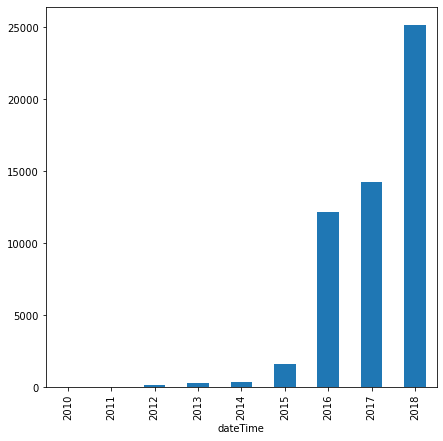

In [20]:
trump_time_group = df_trump.groupby(df_trump['dateTime'].dt.year).size()
trump_time_group.plot(kind='bar', figsize=(7,7))

In [17]:
df_trump[df_trump['dateTime'] > '2016'].count()

index                     51587
timestamp                 51587
text                      51587
speaker                   51587
reply_to                  50498
conversation_id           51587
meta.score                51587
meta.top_level_comment    50498
meta.retrieved_on         51587
meta.gilded               51587
meta.gildings              7873
meta.subreddit            51587
meta.stickied             51587
meta.permalink            51587
meta.author_flair_text    51587
dateTime                  51587
dtype: int64

In [18]:
df_trump[df_trump['dateTime'] <= '2016'].count()

index                     2428
timestamp                 2428
text                      2428
speaker                   2428
reply_to                  2318
conversation_id           2428
meta.score                2428
meta.top_level_comment    2318
meta.retrieved_on         2428
meta.gilded               2428
meta.gildings                0
meta.subreddit            2428
meta.stickied             2428
meta.permalink            2428
meta.author_flair_text    2428
dateTime                  2428
dtype: int64

In [111]:
trump_time_group

dateTime
2010        1
2011        9
2012      159
2013      285
2014      345
2015     1629
2016    12166
2017    14255
2018    25166
dtype: int64

In [125]:
df_trump[df_trump['dateTime'].dt.year == 2010]['text'][0]

'I would like to see how deep this imaginary working man\'s pockets are, since you will have him pay for private healthcare, private roads, private education, private fire fighting, private policing, private transport. Who the F is this worker, Donald Trump???\n\nYou know, the question was IF you HAD a trillion dollars...not if you didn\'t, which is what you "have" now.'

In [108]:
for x in df_trump[df_trump['dateTime'].dt.year == 2011]['text']:
    print(x + '\n')

donald trump is an robot controlled by an alien that looks like a toupee

It is only going to get crazier, but at the same time, there is no way that Trump will end up being the candidate.   

I miss Trump already. Oh look Paul might fail by less this year. Palin is gaining ground. I think she might be an easier sell and certainly more entertaining than Romney. 

&gt;Real estate mogul Donald Trump said Friday he'd consider running for president — again — if the U.S. economy "continues to be bad: and "**if the Republicans pick the wrong candidate**."

Which candidate is the *wrong one*?

End software patents and tech will always eventually trump politics. This definitely looks like a case where Myhrvold is making money in order to be a towering asshole to the world instead of the other way around.

This [shit]( is why I dislike Ron Paul. As a true libertarian, I find it offensive that government would tell someone what they can or cannot do with their own body. He lets his religion trum

In [130]:
print(df_trump[df_trump['dateTime'].dt.year == 2018]['text'][1738] + '\n')

&gt; The investigation can’t continue for over two years without any charges right? 

Well, the Democrats seem to have learned something from the never-ending Republican investigations of Clinton's scandals. :(

The other issue is the topic of cui bono -- who is benefiting from the Russia investigation?

One group that is clearly benefiting is the mass media. The Russia-gate story is dirt cheap and easy to report (you don't even have to leave Washington DC!), and controversy generates ratings. As the CBS CEO said about giving unequal amounts of coverage of Donald Trump in the Republican primary elections, "It may not be good for America, but it's damn good for CBS."

There is a debate among US geo-strategists about what "enemy" country the US should take out first -- Russia or China.

Trump favors friendly relations with Russia and focusing first on China. Hillary Clinton favored securing Europe and focusing on Russia first, leaving China for later.

I would argue there are many in the

## Brexit

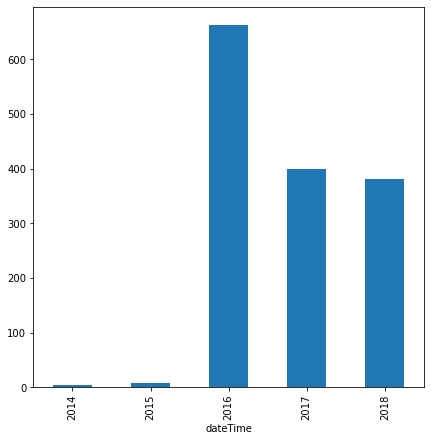

In [21]:
df_brexit=df_politics[df_politics['text'].str.contains('brexit', case=False)]
df_brexit=df_brexit.reset_index()
df_brexit['dateTime'] = pd.to_datetime(df_brexit['timestamp'], unit='s')
# Save joint dataframe to csv
df_brexit.to_csv("brexit.csv", index=False)
brexit_time_group = df_brexit.groupby(df_brexit['dateTime'].dt.year).size()
brexit_time_group.plot(kind='bar', figsize=(7,7))

In [112]:
brexit_time_group

dateTime
2014      5
2015      7
2016    663
2017    399
2018    381
dtype: int64

In [22]:
print(df_brexit['dateTime'].max())
print(df_brexit['dateTime'].min())

2018-10-31 14:54:50
2014-01-21 16:42:19


In [144]:
df_brexit[df_brexit['dateTime'].dt.year == 2018]['text']

3       Here are some other articles about this story:...
4       Also available on iTunes: [\n\n\_\_\_\n\nBLURB...
5       Here are some other articles about this story:...
20      The CPC just sent out an email announcing the ...
993     They got Brexit but they didnt win power. Brex...
                              ...                        
1450    You have no idea. Its shit, motivations, and s...
1451    Man, I clearly struck a nerve when I called yo...
1452    I am sure the bighouse with the rest of the co...
1453    It's an alien concept to aliens because we sho...
1454    Actually you just confirmed I was correct. ty!...
Name: text, Length: 381, dtype: object

In [147]:
df_brexit[df_brexit['dateTime'].dt.year == 2018]['text'][20]

"The CPC just sent out an email announcing the first speaker for the CPC convention in Halifax: Daniel Hannan, [the brains behind Brexit]( An interesting choice. They're not backing away from [Scheer's support for Brexit]("

# Start prediction

In [40]:
import pandas as pd

df_trump = pd.read_csv('trump.csv')
df_brexit = pd.read_csv('brexit.csv')

In [37]:
# load NRC-Emotion_lexicon_worlevel
df_emotion = pd.read_csv('NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', names=['word', 'emotion', 'positive'], delimiter='\t')
print(df_emotion.head())
print(df_emotion.size)

    word       emotion  positive
0  aback         anger         0
1  aback  anticipation         0
2  aback       disgust         0
3  aback          fear         0
4  aback           joy         0
425460


In [79]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm", disable=['parser', 'tagger', 'ner'])
nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [91]:
 def normalize(doc):
    doc = doc.lower()
    nlpedDoc = nlp(doc)
    
    sentences = [sent.string.strip() for sent in nlpedDoc.sents]
    final_sents = []
    for sent in sentences:
        tokens = []
        sent = nlp(sent)
        for token in sent:
            if (not token.is_stop) & (not token.is_punct) & (token.lemma_.strip() != ''):
                tokens.append(token.lemma_.strip())
        final_sents.append(' '.join(tokens))
    return final_sents

In [93]:
df_brexit['Text_After_Clean'] = df_brexit['text'].apply(normalize)
df_trump['Text_After_Clean'] = df_trump['text'].apply(normalize)

In [94]:
df_trump.to_csv("trump.csv", index=False)
df_brexit.to_csv("brexit.csv", index=False)

In [65]:
def locateWord(sentence, df_emotion):
    emotions = []
    for word in sentence:
        if word in df_emotion['word']:
            print('here')
            print(word)
            emotions.append(df_emotion['emotion'])
    return emotions

In [68]:
df_brexit['emotions'] = df_brexit['Text_After_Clean'].apply(lambda x: locateWord(x, df_emotion))
df_trump['emotions'] = df_trump['Text_After_Clean'].apply(lambda x: locateWord(x, df_emotion))

In [7]:
len(df_emotion['word'].unique())

14182